In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from flipper_training.heightmaps.stairs import *
import matplotlib.pyplot as plt

In [8]:
# Configuration
resolution = 0.05
max_coord = 3.2
batch_size = 1
device = "cpu"
seed = 47
rng = torch.manual_seed(seed)
soft_exponent = 100

# Standard Stairs Generation
print("Generating standard stairs...")
rand_hard = StairsHeightmapGenerator(min_steps=3, max_steps=5, min_step_height=0.1, max_step_height=0.2, exponent=None)
x_rh, y_rh, z_rh, e_rh = rand_hard(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_rh = e_rh["step_indices"]
rand_soft = StairsHeightmapGenerator(min_steps=3, max_steps=5, min_step_height=0.1, max_step_height=0.2, exponent=soft_exponent)
x_rs, y_rs, z_rs, e_rs = rand_soft(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_rs = e_rs["step_indices"]
fixed_hard = FixedStairsHeightmapGenerator(normal_angle=0, n_steps=5, step_height=0.25, exponent=None)
x_fh, y_fh, z_fh, e_fh = fixed_hard(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_fh = e_fh["step_indices"]
fixed_soft = FixedStairsHeightmapGenerator(normal_angle=0, n_steps=5, step_height=0.25, exponent=soft_exponent)
x_fs, y_fs, z_fs, e_fs = fixed_soft(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_fs = e_fs["step_indices"]

# Bidirectional Stairs Generation (Opposite Directions)
print("Generating bidirectional stairs with opposite directions...")
step_height = 0.2
bi_rand_hard = BidirectionalStairsHeightmapGenerator(
    min_steps=3,
    max_steps=5,
    min_step_height=step_height,
    max_step_height=step_height,
    exponent=None,
)
x_brh, y_brh, z_brh, e_brh = bi_rand_hard(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_brh = e_brh["step_indices"]
bi_rand_soft = BidirectionalStairsHeightmapGenerator(
    min_steps=3,
    max_steps=3,
    min_step_height=step_height,
    max_step_height=step_height,
    exponent=soft_exponent,
)
x_brs, y_brs, z_brs, e_brs = bi_rand_soft(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)
idx_brs = e_brs["step_indices"]

Generating standard stairs...
Generating bidirectional stairs with opposite directions...


In [ ]:
from flipper_training.vis.static_vis import plot_grids_xyz

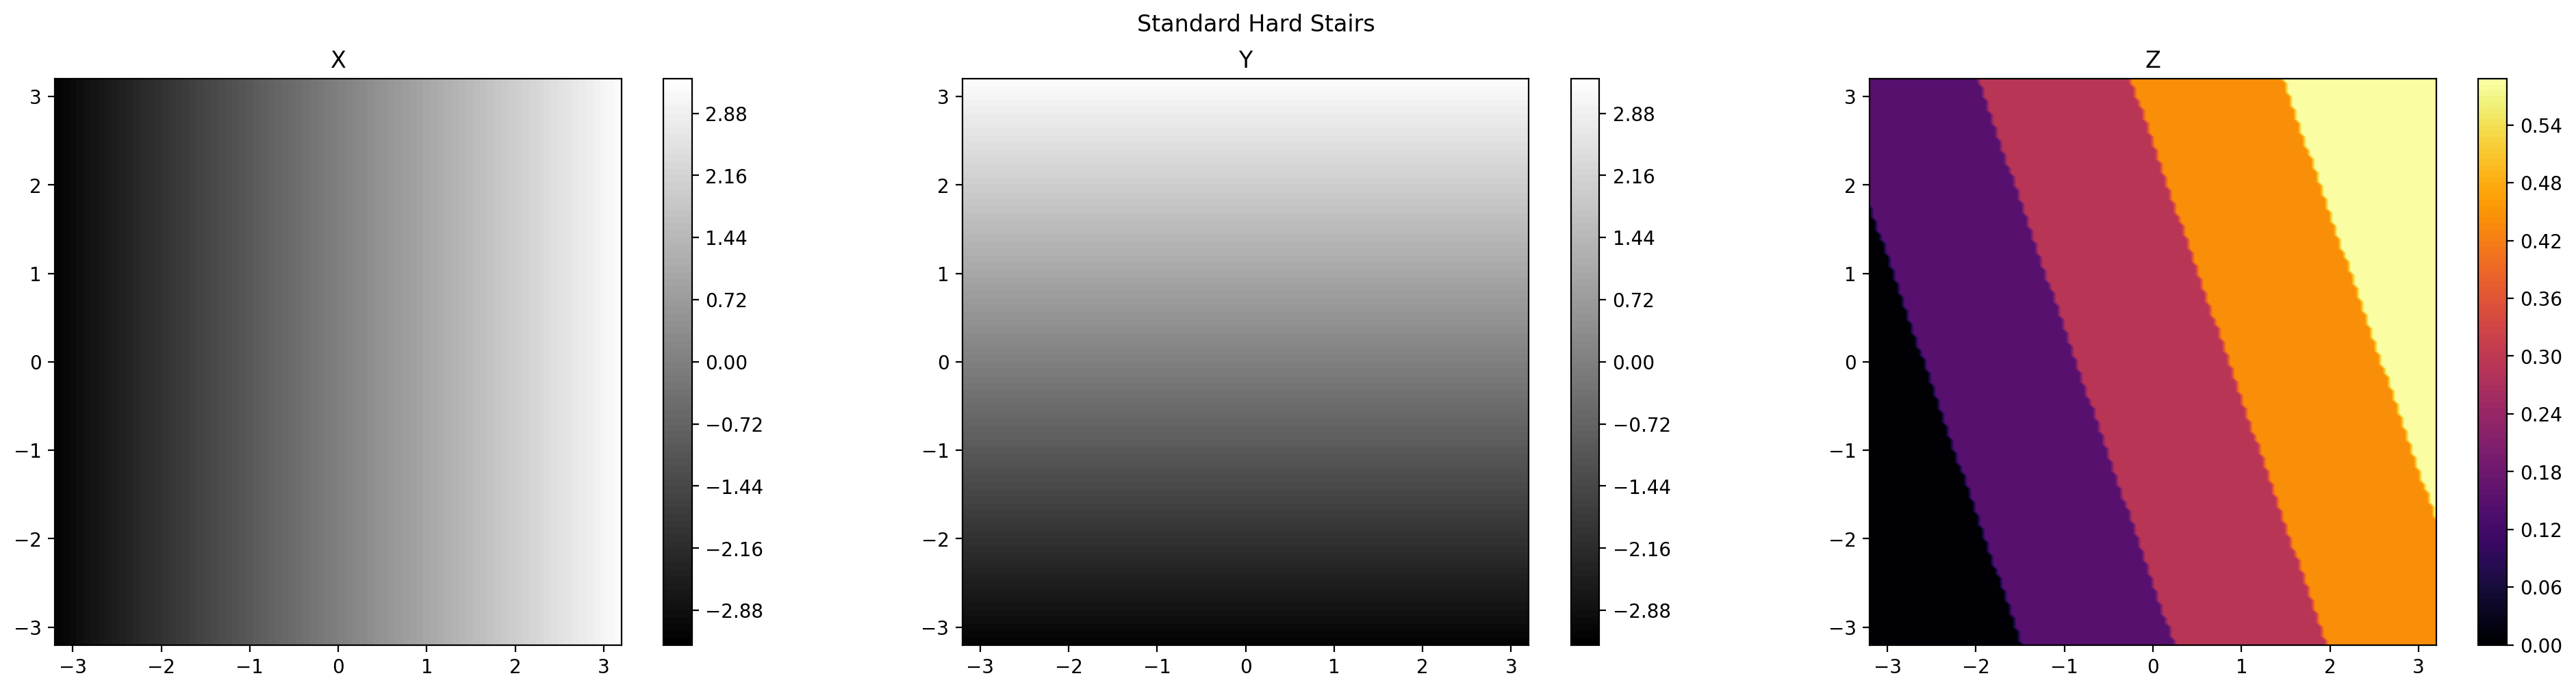

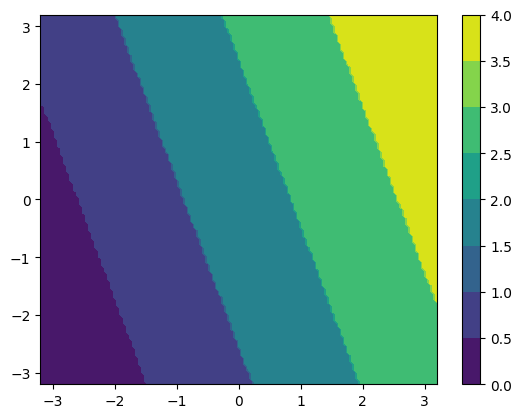

In [9]:
plot_grids_xyz(
    x_rh[0],
    y_rh[0],
    z_rh[0],
    title="Standard Hard Stairs",
)
plt.show()
plt.contourf(x_rh[0], y_rh[0], idx_rh[0])
plt.colorbar()

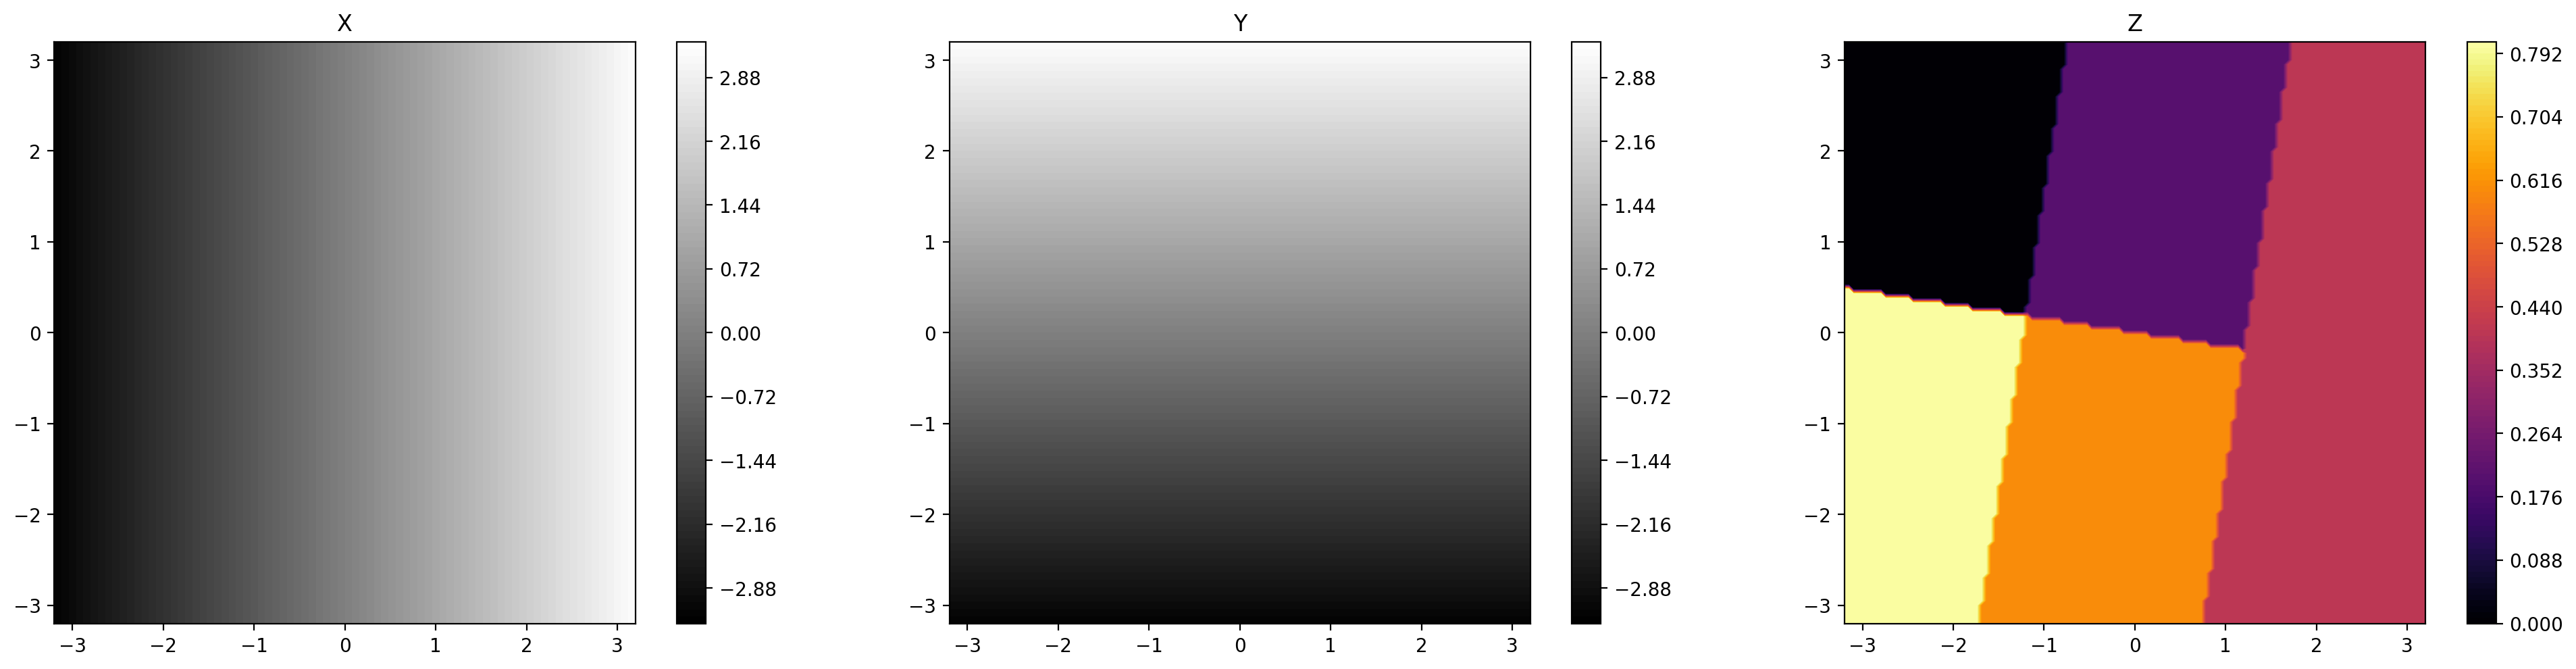

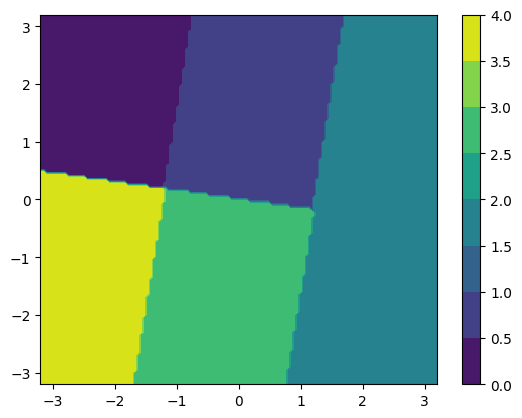

In [10]:
plot_grids_xyz(
    x_brh[0],
    y_brh[0],
    z_brh[0],
)
plt.show()
plt.contourf(x_brh[0], y_brh[0], idx_brh[0])
plt.colorbar()

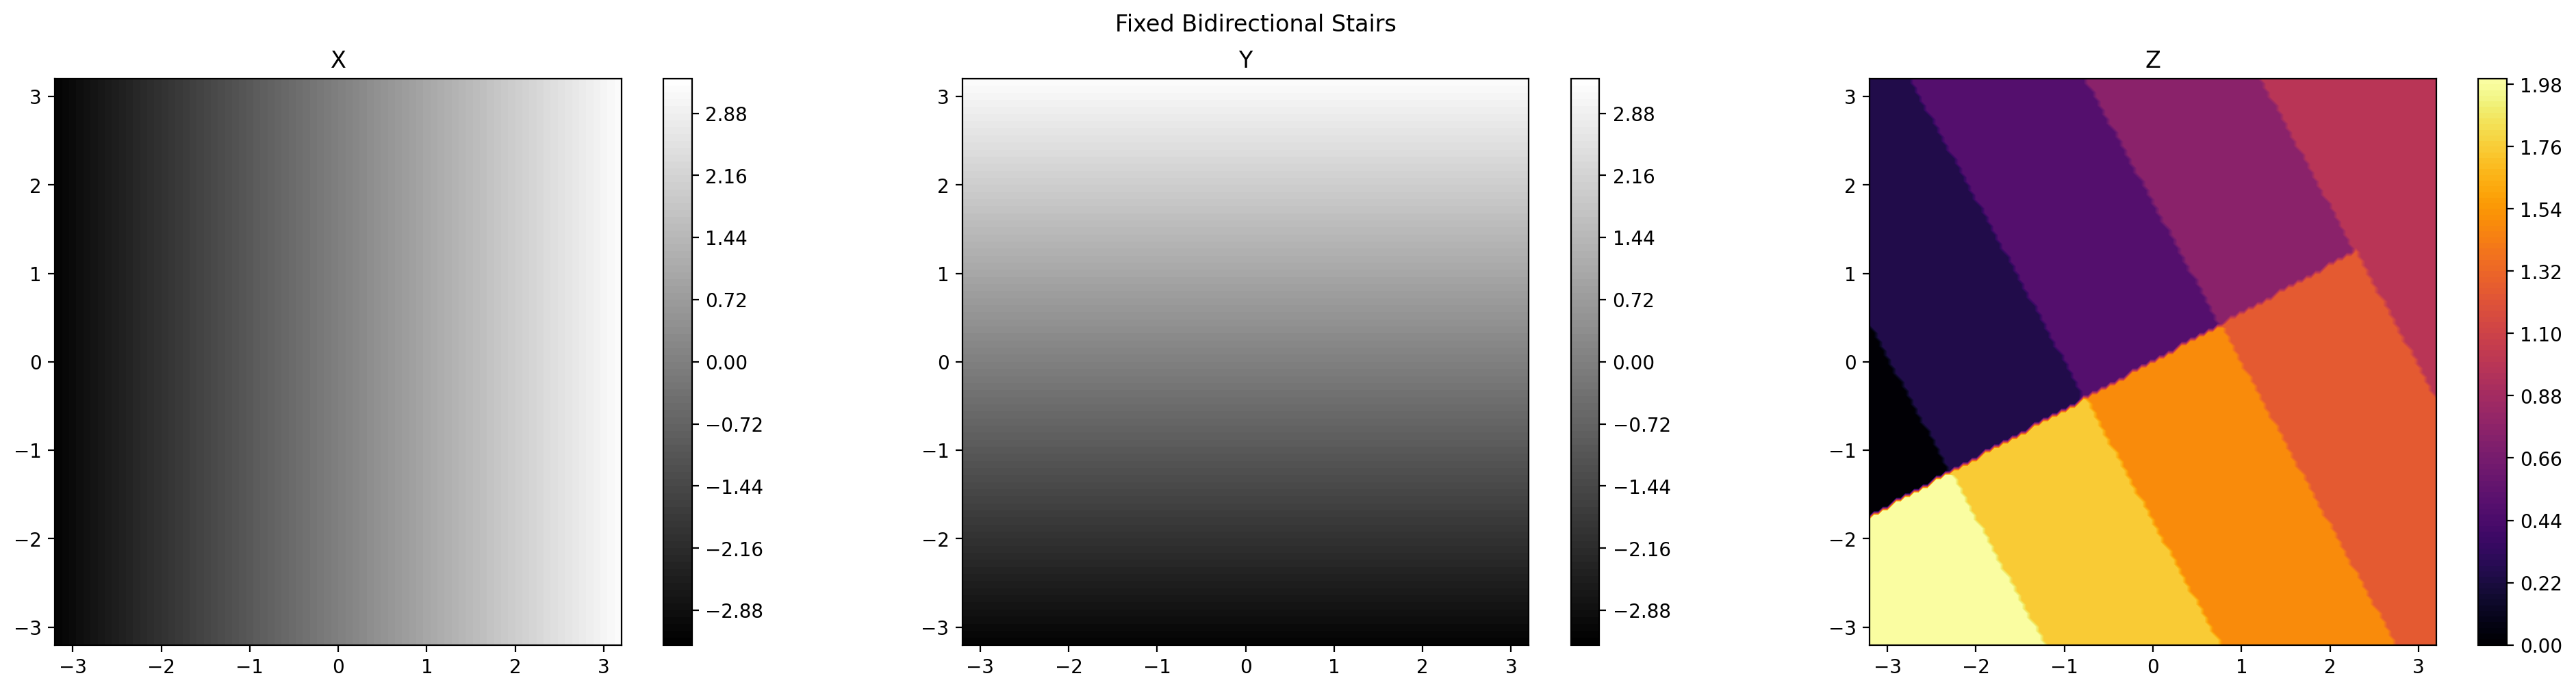

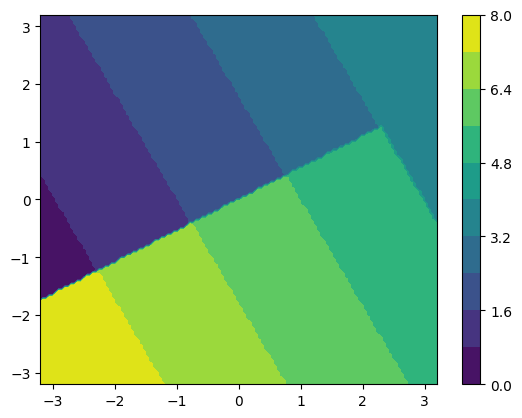

In [18]:
hg = FixedBidirectionalStairsHeightmapGenerator(
    normal_angle=0.5,
    n_steps=5,
    step_height=0.25,
)

x, y, z, e = hg(grid_res=resolution, max_coord=max_coord, num_robots=batch_size, rng=rng)

plot_grids_xyz(
    x[0],
    y[0],
    z[0],
    title="Fixed Bidirectional Stairs",
)
plt.show()
indices = e["step_indices"]
plt.contourf(x[0], y[0], e["step_indices"][0], levels=indices[0].max().item() + 1)
plt.colorbar()